In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [44]:
companies = pd.read_csv('1000_Companies.csv')
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

In [45]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


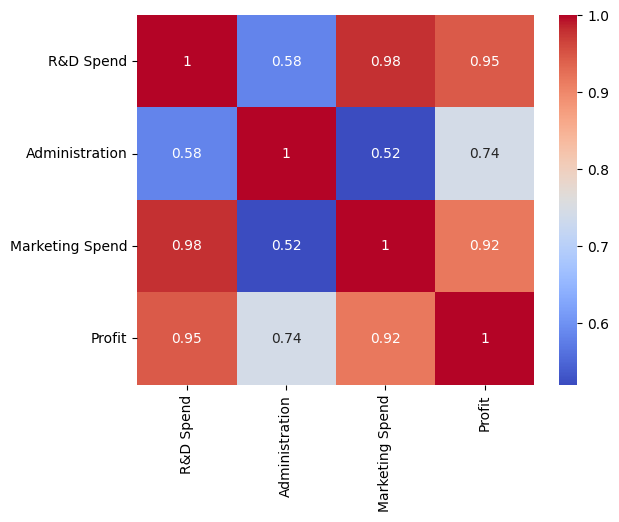

In [46]:
numeric_data = companies.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

categorical_features = [3]  

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  
)


X = np.array(ct.fit_transform(X), dtype=np.float32)


In [48]:

X = X[:, 1:]

In [49]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:

y_pred = regressor.predict(X_test)
y_pred

array([ 89795.14 ,  88431.8  ,  94898.516, 175672.86 ,  83416.   ,
       110572.41 , 132150.23 ,  91477.69 , 164590.05 ,  53231.82 ,
        66957.9  , 150561.92 , 126914.58 ,  59346.617, 177506.28 ,
        75321.67 , 118248.11 , 164568.58 , 170931.72 , 182059.69 ,
       118844.266,  85675.05 , 180983.86 ,  84150.41 , 105008.266,
       101236.516,  53838.1  ,  56889.36 ,  68903.83 , 210032.89 ,
       120778.34 , 111726.36 , 101489.64 , 137956.27 ,  63978.08 ,
       108859.8  , 186004.73 , 171435.23 , 174636.42 , 117671.55 ,
        96733.8  , 165446.3  , 107726.39 ,  50203.945, 116514.11 ,
        58641.35 , 158410.88 ,  78546.97 , 159721.88 , 131136.06 ,
       184871.44 , 174601.23 ,  93749.66 ,  78346.1  , 180736.66 ,
        84466.266, 142897.45 , 170610.6  ,  84369.234, 105308.59 ,
       141656.8  ,  52535.9  , 141840.27 , 139172.81 ,  98297.89 ,
       113587.484, 126752.47 , 152130.23 ,  58872.188, 174277.78 ,
       124623.734, 169059.31 ,  91283.05 , 156164.53 ,  84312.

In [52]:

print(regressor.coef_)

[-8.8102844e+02 -6.9922766e+02  5.2566528e-01  8.4440613e-01
  1.0760498e-01]


In [53]:

print(regressor.intercept_)

-51028.92


In [54]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112616708896897